# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Scaling the data
from sklearn.preprocessing import StandardScaler  

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from imblearn.metrics import *
from sklearn.model_selection import *

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV

In [2]:
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [3]:
%matplotlib notebook

# Data Import (pre-menopause)

In [29]:
data= pd.read_csv('oc_post_outlier_proc.csv')
data

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO,BASO1,BUN,Ca,CA125,CA199,CA724,CEA,CL,CO2CP,CREA,DBIL,EO,EO1,GGT,GLO,GLU,HCT,HE4,HGB,IBIL,K,LYM,LYM1,MCH,MCV,Mg,MONO,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Type
0,6.467504,23.980000,61,39.9,95.000000,9.0,13.0,0.02,0.30,3.21,2.620000,219.808907,19.980000,12.120032,2.460000,100.1,22.3,45.0,2.6,0.040000,0.500000,13.000000,32.1,7.170469,0.417,126.071034,128.0,4.2,4.38,1.27,17.2,26.2,85.3,0.82,0.41,5.50,10.00,142.0,76.500000,0.30,11.2,1.09,304.0,4.89,12.7,6.8,72.0,119.2,1
1,2.750000,16.600000,45,39.2,26.000000,16.0,17.0,0.05,0.74,5.27,2.350000,219.808907,18.410000,12.120032,0.820000,103.2,24.0,65.7,2.9,0.000000,0.070000,17.000000,26.9,4.760000,0.372,126.071034,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1.11,0.42,6.55,7.38,139.1,65.500000,0.25,17.4,1.25,339.0,4.01,14.6,10.9,66.1,215.6,1
2,3.030000,24.050000,76,50.4,76.000000,16.0,23.0,0.04,0.50,5.05,2.680000,39.830000,1.970000,3.710966,3.450000,103.5,21.9,68.0,2.3,0.183434,3.157338,17.000000,26.6,5.670000,0.437,126.071034,140.0,5.1,4.75,1.79,20.5,30.4,94.8,0.86,0.37,4.20,12.00,144.7,70.900000,0.24,15.1,1.17,205.0,4.61,12.8,7.4,77.0,334.2,1
3,4.000000,23.290000,63,44.6,71.000000,14.0,23.0,0.01,0.20,4.90,2.350000,16.650000,58.787461,3.957770,2.190000,104.0,23.0,74.0,1.9,0.010000,0.200000,18.000000,25.2,5.500000,0.377,96.470000,119.0,4.2,4.33,0.89,18.2,30.1,95.4,0.88,0.36,7.40,8.90,141.6,74.000000,0.19,8.8,1.38,215.0,3.95,14.9,6.1,69.8,325.2,1
4,6.467504,16.060000,65,45.6,128.821486,32.0,16.0,0.04,0.70,2.25,2.630000,219.808907,58.787461,12.120032,3.427377,106.6,28.5,49.0,1.4,0.020000,0.300000,38.239033,34.0,4.940000,0.396,126.071034,123.0,3.0,4.26,1.30,22.2,28.4,91.5,1.01,0.35,6.00,9.70,146.9,70.800000,0.30,10.4,1.04,306.0,4.33,12.3,4.4,79.6,234.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.270000,19.620000,65,41.3,73.000000,16.0,23.0,0.03,0.70,5.23,2.710000,8.540000,4.310000,3.728220,2.770000,103.0,22.2,72.0,3.2,0.120000,2.600000,24.000000,33.1,6.140000,0.400,61.080000,135.0,5.9,4.32,1.02,22.5,29.7,87.9,0.91,0.20,4.40,9.80,140.5,69.815125,0.20,10.2,1.10,200.0,4.55,13.5,9.1,74.4,294.0,0
115,5.840000,22.800000,50,45.4,55.000000,18.0,19.0,0.06,0.60,5.49,2.630000,5.120000,5.320000,3.627316,1.900000,101.4,23.1,56.0,3.5,0.130000,1.300000,8.000000,25.5,5.540000,0.374,41.340000,123.0,7.2,4.00,1.30,12.7,31.6,96.1,0.95,0.38,3.70,11.20,143.3,81.714560,0.24,13.1,1.11,214.0,3.89,11.8,10.7,70.9,266.7,0
116,4.890000,9.500000,67,44.0,76.000000,13.0,24.0,0.04,0.60,5.86,1.891785,15.060000,32.680000,4.338559,4.040000,101.5,24.5,51.0,2.7,0.080000,1.300000,12.000000,30.9,6.110000,0.421,55.230000,132.0,6.5,4.30,1.69,27.1,28.8,91.7,1.00,0.32,5.10,12.60,143.0,65.911381,0.18,17.6,1.24,141.0,4.59,13.6,9.2,74.9,240.3,0
117,6.467504,8.789439,58,45.7,83.000000,12.0,14.0,0.01,0.20,5.31,1.891785,17.720000,28.080000,3.999032,3.710000,102.5,19.9,73.0,3.4,0.100000,1.700000,15.000000,34.2,5.390000,0.432,54.940000,154.0,7.4,4.15,1.48,25.9,30.2,89.0,0.92,0.25,4.40,11.80,144.2,67.789084,0.22,16.9,0.93,187.0,5.10,12.4,10.8,79.9,373.4,0


In [30]:
x= data.drop("Type",axis=1)
y= data["Type"]

In [31]:
x.shape

(119, 48)

In [32]:
x

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO,BASO1,BUN,Ca,CA125,CA199,CA724,CEA,CL,CO2CP,CREA,DBIL,EO,EO1,GGT,GLO,GLU,HCT,HE4,HGB,IBIL,K,LYM,LYM1,MCH,MCV,Mg,MONO,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,6.467504,23.980000,61,39.9,95.000000,9.0,13.0,0.02,0.30,3.21,2.620000,219.808907,19.980000,12.120032,2.460000,100.1,22.3,45.0,2.6,0.040000,0.500000,13.000000,32.1,7.170469,0.417,126.071034,128.0,4.2,4.38,1.27,17.2,26.2,85.3,0.82,0.41,5.50,10.00,142.0,76.500000,0.30,11.2,1.09,304.0,4.89,12.7,6.8,72.0,119.2
1,2.750000,16.600000,45,39.2,26.000000,16.0,17.0,0.05,0.74,5.27,2.350000,219.808907,18.410000,12.120032,0.820000,103.2,24.0,65.7,2.9,0.000000,0.070000,17.000000,26.9,4.760000,0.372,126.071034,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1.11,0.42,6.55,7.38,139.1,65.500000,0.25,17.4,1.25,339.0,4.01,14.6,10.9,66.1,215.6
2,3.030000,24.050000,76,50.4,76.000000,16.0,23.0,0.04,0.50,5.05,2.680000,39.830000,1.970000,3.710966,3.450000,103.5,21.9,68.0,2.3,0.183434,3.157338,17.000000,26.6,5.670000,0.437,126.071034,140.0,5.1,4.75,1.79,20.5,30.4,94.8,0.86,0.37,4.20,12.00,144.7,70.900000,0.24,15.1,1.17,205.0,4.61,12.8,7.4,77.0,334.2
3,4.000000,23.290000,63,44.6,71.000000,14.0,23.0,0.01,0.20,4.90,2.350000,16.650000,58.787461,3.957770,2.190000,104.0,23.0,74.0,1.9,0.010000,0.200000,18.000000,25.2,5.500000,0.377,96.470000,119.0,4.2,4.33,0.89,18.2,30.1,95.4,0.88,0.36,7.40,8.90,141.6,74.000000,0.19,8.8,1.38,215.0,3.95,14.9,6.1,69.8,325.2
4,6.467504,16.060000,65,45.6,128.821486,32.0,16.0,0.04,0.70,2.25,2.630000,219.808907,58.787461,12.120032,3.427377,106.6,28.5,49.0,1.4,0.020000,0.300000,38.239033,34.0,4.940000,0.396,126.071034,123.0,3.0,4.26,1.30,22.2,28.4,91.5,1.01,0.35,6.00,9.70,146.9,70.800000,0.30,10.4,1.04,306.0,4.33,12.3,4.4,79.6,234.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.270000,19.620000,65,41.3,73.000000,16.0,23.0,0.03,0.70,5.23,2.710000,8.540000,4.310000,3.728220,2.770000,103.0,22.2,72.0,3.2,0.120000,2.600000,24.000000,33.1,6.140000,0.400,61.080000,135.0,5.9,4.32,1.02,22.5,29.7,87.9,0.91,0.20,4.40,9.80,140.5,69.815125,0.20,10.2,1.10,200.0,4.55,13.5,9.1,74.4,294.0
115,5.840000,22.800000,50,45.4,55.000000,18.0,19.0,0.06,0.60,5.49,2.630000,5.120000,5.320000,3.627316,1.900000,101.4,23.1,56.0,3.5,0.130000,1.300000,8.000000,25.5,5.540000,0.374,41.340000,123.0,7.2,4.00,1.30,12.7,31.6,96.1,0.95,0.38,3.70,11.20,143.3,81.714560,0.24,13.1,1.11,214.0,3.89,11.8,10.7,70.9,266.7
116,4.890000,9.500000,67,44.0,76.000000,13.0,24.0,0.04,0.60,5.86,1.891785,15.060000,32.680000,4.338559,4.040000,101.5,24.5,51.0,2.7,0.080000,1.300000,12.000000,30.9,6.110000,0.421,55.230000,132.0,6.5,4.30,1.69,27.1,28.8,91.7,1.00,0.32,5.10,12.60,143.0,65.911381,0.18,17.6,1.24,141.0,4.59,13.6,9.2,74.9,240.3
117,6.467504,8.789439,58,45.7,83.000000,12.0,14.0,0.01,0.20,5.31,1.891785,17.720000,28.080000,3.999032,3.710000,102.5,19.9,73.0,3.4,0.100000,1.700000,15.000000,34.2,5.390000,0.432,54.940000,154.0,7.4,4.15,1.48,25.9,30.2,89.0,0.92,0.25,4.40,11.80,144.2,67.789084,0.22,16.9,0.93,187.0,5.10,12.4,10.8,79.9,373.4


# Standardization

In [33]:
scaler= StandardScaler()  
xs= scaler.fit_transform(x)

# Classification models and metrics define

In [23]:
knn= KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
svm= SVC(random_state=10,kernel='rbf')
lr = LogisticRegression()
dt = DecisionTreeClassifier() 

rf= RandomForestClassifier(n_jobs=-1,random_state=10)
ada= AdaBoostClassifier(random_state=100)

lgbm = LGBMClassifier(n_jobs=-1,random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier(use_label_encoder =False, eval_metric='logloss',random_state=100)

In [9]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),
        'roc': make_scorer(roc_auc_score),
        'precision': make_scorer(precision_score),
        'mcc':  make_scorer(matthews_corrcoef)
        }

# Performance of classifiers on all features

In [34]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            12.962155
score_time           2.023399
test_accuracy       94.090909
test_recall         98.888889
test_specificity    75.000000
test_gmean          84.821480
test_roc            86.944444
test_precision      94.181818
test_mcc            80.520157
dtype: float64

In [35]:
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             8.110867
score_time           1.093826
test_accuracy       91.590909
test_recall         93.666667
test_specificity    83.333333
test_gmean          87.272779
test_roc            88.500000
test_precision      95.777778
test_mcc            75.476214
dtype: float64

In [36]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            43.650355
score_time           0.925872
test_accuracy       94.924242
test_recall         97.888889
test_specificity    83.333333
test_gmean          88.980865
test_roc            90.611111
test_precision      96.181818
test_mcc            84.095499
dtype: float64

In [37]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.152493
score_time           0.331075
test_accuracy       91.666667
test_recall         98.888889
test_specificity    65.000000
test_gmean          75.151672
test_roc            81.944444
test_precision      91.727273
test_mcc            71.453516
dtype: float64

In [38]:
# svm
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.089393
score_time           2.076039
test_accuracy       88.257576
test_recall         94.555556
test_specificity    65.000000
test_gmean          68.775746
test_roc            79.777778
test_precision      91.590909
test_mcc            58.852636
dtype: float64

In [39]:
# svm
score = cross_validate(dt, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.165129
score_time           0.328643
test_accuracy       90.757576
test_recall         95.666667
test_specificity    71.666667
test_gmean          77.684173
test_roc            83.666667
test_precision      93.454545
test_mcc            70.774659
dtype: float64

In [40]:
# svm
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.030093
score_time           0.317872
test_accuracy       95.000000
test_recall         96.777778
test_specificity    90.000000
test_gmean          92.523200
test_roc            93.388889
test_precision      97.000000
test_mcc            86.238888
dtype: float64

In [41]:
# xgboost
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             5.889335
score_time           0.628185
test_accuracy       92.500000
test_recall         92.666667
test_specificity    91.666667
test_gmean          91.835370
test_roc            92.166667
test_precision      97.571429
test_mcc            80.165600
dtype: float64

In [42]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             7.161422
score_time           0.937629
test_accuracy       94.924242
test_recall         97.888889
test_specificity    83.333333
test_gmean          88.980865
test_roc            90.611111
test_precision      96.181818
test_mcc            84.095499
dtype: float64

In [15]:
fcorr= ['IBIL', 'PCT', 'TBIL', 'CA125', 'PLT', 'HE4', 'LYM1', 'MCH', 'CA724',
       'HGB', 'NEU', 'MONO', 'DBIL', 'ALB', 'BUN', 'BASO1', 'CO2CP', 'ALT',
       'LYM', 'HCT']

# RFECV 

<IPython.core.display.Javascript object>


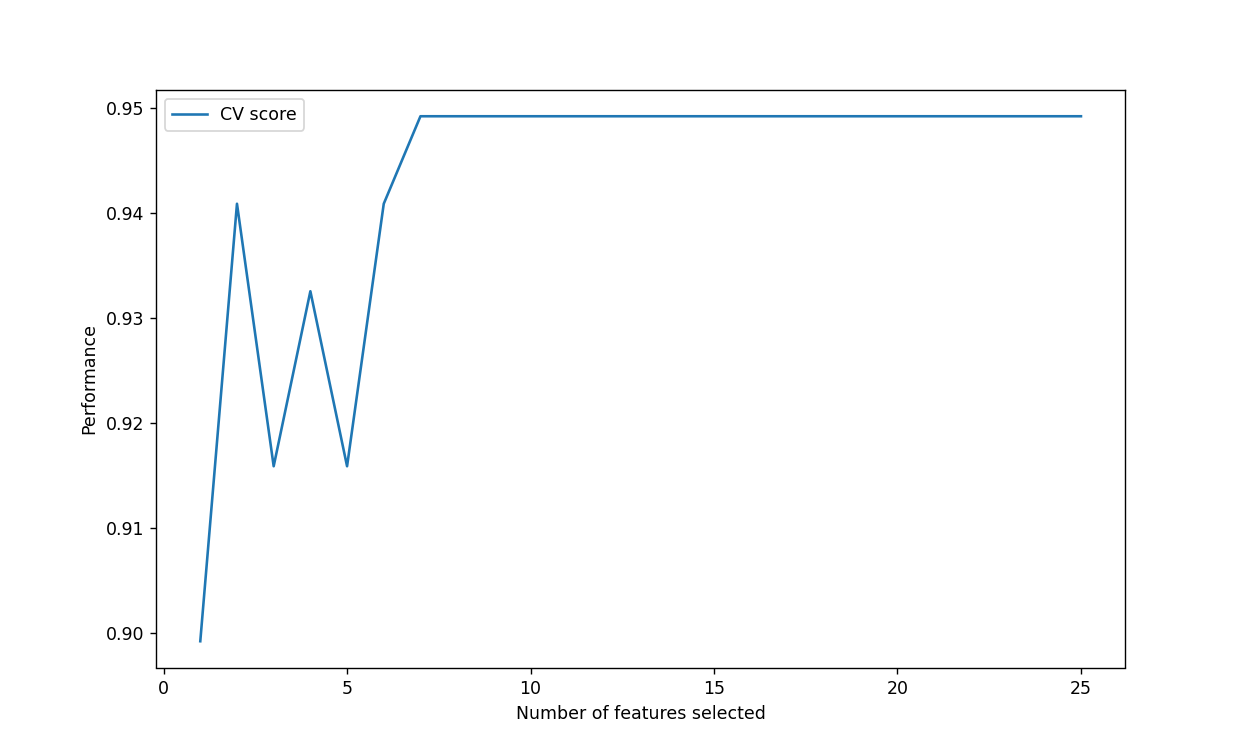

Column names of the best features:
Index(['ALB', 'ALT', 'BUN', 'CA125', 'CA199', 'CA724', 'CREA', 'GLO', 'GLU',
       'HE4', 'PCT', 'RDW'],
      dtype='object')


In [16]:
rfecv = RFECV(estimator=xg, step=2, cv=10, scoring='accuracy')

# Fit the RFECV object to the data
rfecv.fit(x, y)

# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()

# Get the column names of the best features
best_features = x.columns[rfecv.support_]

# print the column names of the selected features
print("Column names of the best features:")
print(best_features)

In [49]:
best_features= ['ALB', 'ALT', 'BUN', 'CA125', 'CA199', 'CA724', 'CREA', 'GLO', 'GLU',
       'HE4', 'PCT', 'RDW']
x_rfecv = x[best_features]
xs= scaler.fit_transform(x_rfecv)
x_rfecv

,ALB,ALT,BUN,CA125,CA199,CA724,CREA,GLO,GLU,HE4,PCT,RDW
0,39.9,9.0,3.21,219.808907,19.980000,12.120032,45.0,32.1,7.170469,126.071034,0.30,12.7
1,39.2,16.0,5.27,219.808907,18.410000,12.120032,65.7,26.9,4.760000,126.071034,0.25,14.6
2,50.4,16.0,5.05,39.830000,1.970000,3.710966,68.0,26.6,5.670000,126.071034,0.24,12.8
3,44.6,14.0,4.90,16.650000,58.787461,3.957770,74.0,25.2,5.500000,96.470000,0.19,14.9
4,45.6,32.0,2.25,219.808907,58.787461,12.120032,49.0,34.0,4.940000,126.071034,0.30,12.3
...,...,...,...,...,...,...,...,...,...,...,...,...
114,41.3,16.0,5.23,8.540000,4.310000,3.728220,72.0,33.1,6.140000,61.080000,0.20,13.5
115,45.4,18.0,5.49,5.120000,5.320000,3.627316,56.0,25.5,5.540000,41.340000,0.24,11.8
116,44.0,13.0,5.86,15.060000,32.680000,4.338559,51.0,30.9,6.110000,55.230000,0.18,13.6
117,45.7,12.0,5.31,17.720000,28.080000,3.999032,73.0,34.2,5.390000,54.940000,0.22,12.4


In [18]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            38.361716
score_time           1.001461
test_accuracy       95.757576
test_recall         98.888889
test_specificity    83.333333
test_gmean          89.343729
test_roc            91.111111
test_precision      96.272727
test_mcc            86.837498
dtype: float64

In [50]:
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             9.718018
score_time           1.178861
test_accuracy       93.297101
test_recall         99.000000
test_specificity    71.000000
test_gmean          74.702641
test_roc            85.000000
test_precision      93.833333
test_mcc            71.753135
dtype: float64

In [51]:
score = cross_validate(xg, x,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             8.055930
score_time           0.312519
test_accuracy       93.297101
test_recall         98.947368
test_specificity    71.000000
test_gmean          75.209052
test_roc            84.973684
test_precision      93.652174
test_mcc            72.178226
dtype: float64

<IPython.core.display.Javascript object>


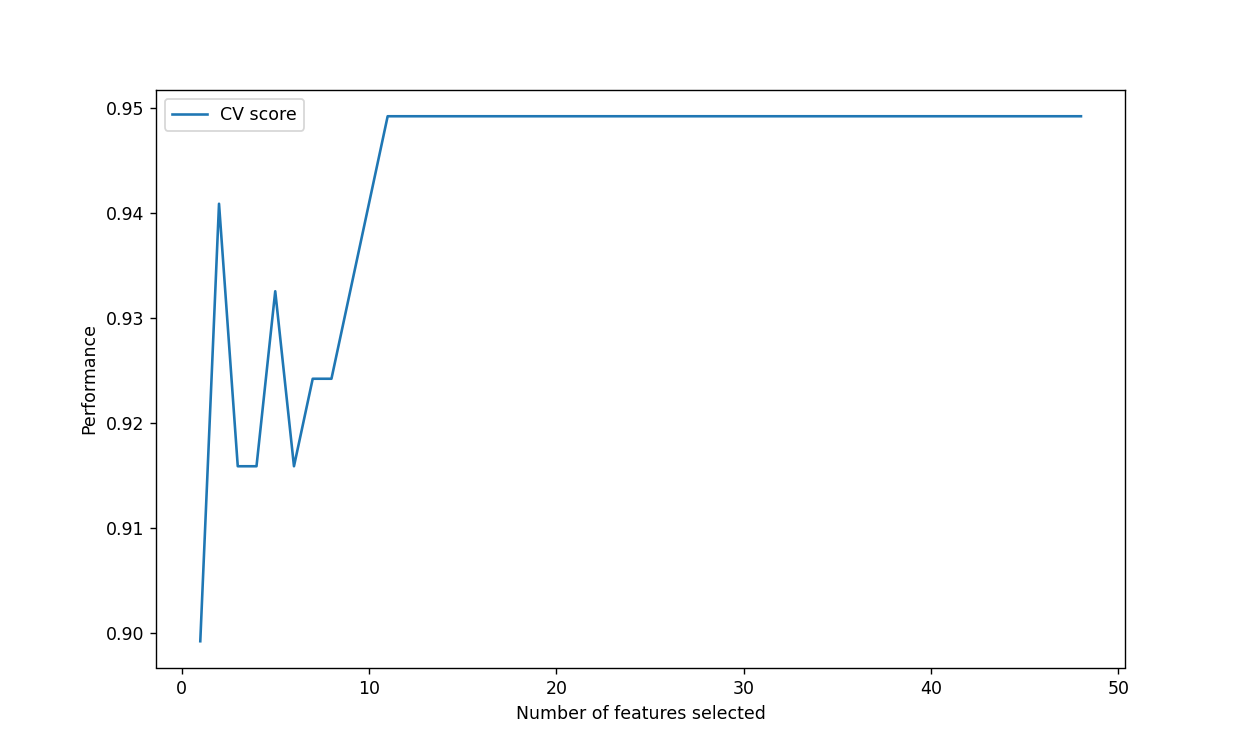

Column names of the best features:
Index(['ALT', 'BUN', 'CA125', 'CA724', 'CREA', 'DBIL', 'GLO', 'GLU', 'HE4',
       'PCT', 'RDW'],
      dtype='object')


In [19]:
# rfecv - all - xg
rfecv = RFECV(estimator=xg, step=1, cv=10, scoring='accuracy')

# Fit the RFECV object to the data
rfecv.fit(x, y)

# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()

# Get the column names of the best features
best_features = x.columns[rfecv.support_]

# print the column names of the selected features
print("Column names of the best features:")
print(best_features)

In [20]:
x_rfecv = x[best_features]
xs= scaler.fit_transform(x_rfecv)
x_rfecv

,ALT,BUN,CA125,CA724,CREA,DBIL,GLO,GLU,HE4,PCT,RDW
0,9.0,3.21,219.808907,12.120032,45.0,2.6,32.1,7.170469,126.071034,0.30,12.7
1,16.0,5.27,219.808907,12.120032,65.7,2.9,26.9,4.760000,126.071034,0.25,14.6
2,16.0,5.05,39.830000,3.710966,68.0,2.3,26.6,5.670000,126.071034,0.24,12.8
3,14.0,4.90,16.650000,3.957770,74.0,1.9,25.2,5.500000,96.470000,0.19,14.9
4,32.0,2.25,219.808907,12.120032,49.0,1.4,34.0,4.940000,126.071034,0.30,12.3
...,...,...,...,...,...,...,...,...,...,...,...
114,16.0,5.23,8.540000,3.728220,72.0,3.2,33.1,6.140000,61.080000,0.20,13.5
115,18.0,5.49,5.120000,3.627316,56.0,3.5,25.5,5.540000,41.340000,0.24,11.8
116,13.0,5.86,15.060000,4.338559,51.0,2.7,30.9,6.110000,55.230000,0.18,13.6
117,12.0,5.31,17.720000,3.999032,73.0,3.4,34.2,5.390000,54.940000,0.22,12.4


In [21]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             6.283867
score_time           0.781310
test_accuracy       94.924242
test_recall         98.888889
test_specificity    80.000000
test_gmean          83.570226
test_roc            89.444444
test_precision      95.590909
test_mcc            81.615168
dtype: float64

In [22]:
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             2.634349
score_time           1.251602
test_accuracy       93.297101
test_recall         99.000000
test_specificity    71.000000
test_gmean          74.702641
test_roc            85.000000
test_precision      93.833333
test_mcc            71.753135
dtype: float64

# GA - RF

In [33]:
report= pd.DataFrame()
nofeats=[]
chosen_feats=[]
cvscore=[]

In [34]:
model=rf
from genetic_selection import GeneticSelectionCV
for i in range(2,12):
    selector= GeneticSelectionCV(model, cv=5, scoring=make_scorer(accuracy_score), verbose=0,
                                max_features=i,
                                n_population=100,
                                crossover_proba=0.5,
                                mutation_proba=0.2,
                                n_generations=10,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.5,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
    selector = selector.fit(xc, y)
    genfeats = xc.columns[selector.support_]
    genfeats = list(genfeats)
    print("Chosen Feats:  ", genfeats)

    cv_score = selector.generation_scores_[-1]
    nofeats.append(len(genfeats)) 
    chosen_feats.append(genfeats) 
    cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

Chosen Feats:   ['CA125', 'ALT']
Chosen Feats:   ['CA125', 'HE4', 'BUN']
Chosen Feats:   ['PCT', 'CA125', 'HE4', 'HGB']
Chosen Feats:   ['CA125', 'HE4', 'BUN']
Chosen Feats:   ['CA125', 'HE4', 'BUN']
Chosen Feats:   ['CA125', 'HE4', 'BUN']
Chosen Feats:   ['CA125', 'HE4', 'BUN']
Chosen Feats:   ['PCT', 'TBIL', 'CA125', 'PLT', 'HE4', 'HGB', 'BUN', 'LYM']
Chosen Feats:   ['CA125', 'PLT', 'HE4', 'BUN', 'HCT']
Chosen Feats:   ['PCT', 'CA125', 'HE4', 'LYM1', 'BUN', 'HCT']


In [35]:
report["Scores"] = np.round(report["Scores"], 5)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
#DataTable(report)
print(ga_feats)

['PCT', 'TBIL', 'CA125', 'PLT', 'HE4', 'HGB', 'BUN', 'LYM']


In [36]:
report

,No of Feats,Chosen Feats,Scores
7,8,"[PCT, TBIL, CA125, PLT, HE4, HGB, BUN, LYM]",0.96667
1,3,"[CA125, HE4, BUN]",0.96630
3,3,"[CA125, HE4, BUN]",0.96630
4,3,"[CA125, HE4, BUN]",0.96630
5,3,"[CA125, HE4, BUN]",0.96630
6,3,"[CA125, HE4, BUN]",0.96630
8,5,"[CA125, PLT, HE4, BUN, HCT]",0.96630
9,6,"[PCT, CA125, HE4, LYM1, BUN, HCT]",0.96630
2,4,"[PCT, CA125, HE4, HGB]",0.95797
0,2,"[CA125, ALT]",0.93261


In [37]:
ga_feature= ['PCT', 'TBIL', 'CA125', 'PLT', 'HE4', 'HGB', 'BUN', 'LYM']

In [38]:
x_ga= x[ga_feature]
x_ga

,PCT,TBIL,CA125,PLT,HE4,HGB,BUN,LYM
0,0.30,6.8,2444.00,304,934.10,128.0,3.21,1.27
1,0.25,10.9,2555.00,339,853.50,123.0,5.27,1.73
2,0.24,7.4,39.83,205,535.90,140.0,5.05,1.79
3,0.19,6.1,16.65,215,96.47,119.0,4.90,0.89
4,0.30,4.4,3271.00,306,1352.00,123.0,2.25,1.30
...,...,...,...,...,...,...,...,...
114,0.20,9.1,8.54,200,61.08,135.0,5.23,1.02
115,0.24,10.7,5.12,214,41.34,123.0,5.49,1.30
116,0.18,9.2,15.06,141,55.23,132.0,5.86,1.69
117,0.22,10.8,17.72,187,54.94,154.0,5.31,1.48


In [39]:
scaler= StandardScaler()  
xs= scaler.fit_transform(x_ga)

In [40]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             12.979584
score_time            2.117605
test_accuracy        96.590909
test_recall         100.000000
test_specificity     83.333333
test_gmean           89.915638
test_roc             91.666667
test_precision       96.272727
test_mcc             88.672532
dtype: float64

# GA - XG

In [23]:
report= pd.DataFrame()
nofeats=[]
chosen_feats=[]
cvscore=[]

In [24]:
model=xg
from genetic_selection import GeneticSelectionCV
for i in range(2,15):
    selector= GeneticSelectionCV(model, cv=5, scoring=make_scorer(accuracy_score), verbose=0,
                                max_features=i,
                                n_population=100,
                                crossover_proba=0.5,
                                mutation_proba=0.2,
                                n_generations=10,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.5,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
    selector = selector.fit(x, y)
    genfeats = x.columns[selector.support_]
    genfeats = list(genfeats)
    print("Chosen Feats:  ", genfeats)

    cv_score = selector.generation_scores_[-1]
    nofeats.append(len(genfeats)) 
    chosen_feats.append(genfeats) 
    cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

Chosen Feats:   ['CA125', 'HE4']
Chosen Feats:   ['CA125', 'EO']
Chosen Feats:   ['CA125', 'DBIL']
Chosen Feats:   ['CA125', 'CL', 'PHOS']
Chosen Feats:   ['CA125', 'CL', 'PCT']
Chosen Feats:   ['CA125', 'CA199', 'HGB']
Chosen Feats:   ['Ca', 'CA125', 'CL']
Chosen Feats:   ['CA724', 'CL', 'GLU', 'HE4', 'IBIL']
Chosen Feats:   ['CA125', 'EO', 'GLU', 'HE4', 'Na', 'NEU', 'TP']
Chosen Feats:   ['CA125', 'CA199', 'HCT', 'K', 'MONO1', 'Na', 'RBC']
Chosen Feats:   ['CA125', 'CA199', 'CL', 'CO2CP', 'LYM', 'RBC']
Chosen Feats:   ['GLU', 'HE4', 'IBIL', 'Na', 'RBC']
Chosen Feats:   ['CA125', 'CA199', 'HCT', 'HGB', 'IBIL', 'PCT']


In [25]:
report["Scores"] = np.round(report["Scores"], 5)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
#DataTable(report)
print(ga_feats)

['CA125', 'CA199', 'HCT', 'K', 'MONO1', 'Na', 'RBC']


In [26]:
report

,No of Feats,Chosen Feats,Scores
9,7,"[CA125, CA199, HCT, K, MONO1, Na, RBC]",0.95761
3,3,"[CA125, CL, PHOS]",0.94964
6,3,"[Ca, CA125, CL]",0.94964
8,7,"[CA125, EO, GLU, HE4, Na, NEU, TP]",0.94964
10,6,"[CA125, CA199, CL, CO2CP, LYM, RBC]",0.94964
12,6,"[CA125, CA199, HCT, HGB, IBIL, PCT]",0.94964
7,5,"[CA724, CL, GLU, HE4, IBIL]",0.94167
11,5,"[GLU, HE4, IBIL, Na, RBC]",0.94167
4,3,"[CA125, CL, PCT]",0.94130
5,3,"[CA125, CA199, HGB]",0.94130


In [27]:
ga_feature= ['CA125', 'CA199', 'HCT', 'K', 'MONO1', 'Na', 'RBC']

In [28]:
x_ga= x[ga_feature]
x_ga

,CA125,CA199,HCT,K,MONO1,Na,RBC
0,219.808907,19.980000,0.417,4.38,5.50,142.0,4.89
1,219.808907,18.410000,0.372,4.70,6.55,139.1,4.01
2,39.830000,1.970000,0.437,4.75,4.20,144.7,4.61
3,16.650000,58.787461,0.377,4.33,7.40,141.6,3.95
4,219.808907,58.787461,0.396,4.26,6.00,146.9,4.33
...,...,...,...,...,...,...,...
114,8.540000,4.310000,0.400,4.32,4.40,140.5,4.55
115,5.120000,5.320000,0.374,4.00,3.70,143.3,3.89
116,15.060000,32.680000,0.421,4.30,5.10,143.0,4.59
117,17.720000,28.080000,0.432,4.15,4.40,144.2,5.10


In [29]:
scaler= StandardScaler()  
xs= scaler.fit_transform(x_ga)

In [30]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            14.857364
score_time           1.093805
test_accuracy       91.515152
test_recall         96.888889
test_specificity    70.000000
test_gmean          72.694195
test_roc            83.444444
test_precision      93.772727
test_mcc            66.652931
dtype: float64

In [31]:
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             9.447117
score_time           0.312557
test_accuracy       95.760870
test_recall         97.894737
test_specificity    86.000000
test_gmean          91.020136
test_roc            91.947368
test_precision      97.042607
test_mcc            86.169689
dtype: float64

In [55]:
ga_feature= ['CA125', 'CA199', 'HCT', 'K', 'Na', 'RBC']

In [56]:
x_ga= x[ga_feature]
x_ga

,CA125,CA199,HCT,K,Na,RBC
0,219.808907,19.980000,0.417,4.38,142.0,4.89
1,219.808907,18.410000,0.372,4.70,139.1,4.01
2,39.830000,1.970000,0.437,4.75,144.7,4.61
3,16.650000,58.787461,0.377,4.33,141.6,3.95
4,219.808907,58.787461,0.396,4.26,146.9,4.33
...,...,...,...,...,...,...
114,8.540000,4.310000,0.400,4.32,140.5,4.55
115,5.120000,5.320000,0.374,4.00,143.3,3.89
116,15.060000,32.680000,0.421,4.30,143.0,4.59
117,17.720000,28.080000,0.432,4.15,144.2,5.10


In [57]:
scaler= StandardScaler()  
xs= scaler.fit_transform(x_ga)

In [58]:
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             8.539147
score_time           0.937538
test_accuracy       94.891304
test_recall         97.894737
test_specificity    81.000000
test_gmean          86.878001
test_roc            89.447368
test_precision      96.220096
test_mcc            82.011039
dtype: float64

In [59]:
ga_feature= ['CA125', 'CA199', 'HCT', 'K', 'MONO1', 'RBC']

In [60]:
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             7.774367
score_time           1.037631
test_accuracy       95.797101
test_recall         97.894737
test_specificity    87.000000
test_gmean          92.143368
test_roc            92.447368
test_precision      96.894737
test_mcc            86.776680
dtype: float64

In [62]:
ga_feature= ['CA125', 'CA199', 'HCT', 'K', 'MONO1', 'RBC','HE4']
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            13.716402
score_time           1.093829
test_accuracy       90.757576
test_recall         94.888889
test_specificity    76.666667
test_gmean          79.803433
test_roc            85.777778
test_precision      94.500000
test_mcc            70.689658
dtype: float64

In [64]:
ga_feature= ['CA125', 'CA199', 'K', 'MONO1', 'RBC','Na']
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             6.875920
score_time           0.625076
test_accuracy       94.927536
test_recall         96.842105
test_specificity    86.000000
test_gmean          90.529575
test_roc            91.421053
test_precision      96.984127
test_mcc            84.253996
dtype: float64

In [32]:
ga_feature= ['GLU', 'CA125', 'HE4',]
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             4.698133
score_time           0.373602
test_accuracy       92.463768
test_recall         97.947368
test_specificity    70.000000
test_gmean          74.202451
test_roc            83.973684
test_precision      93.652174
test_mcc            68.742630
dtype: float64

In [36]:
ga_feature= ['GLU', 'CA125', 'HE4',]
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             7.029047
score_time           0.937576
test_accuracy       93.257576
test_recall         96.777778
test_specificity    80.000000
test_gmean          83.207362
test_roc            88.388889
test_precision      95.272727
test_mcc            77.132393
dtype: float64

In [33]:
ga_feature= [ 'CA125', 'HE4',]
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             3.942957
score_time           0.356083
test_accuracy       93.297101
test_recall         98.947368
test_specificity    71.000000
test_gmean          74.675622
test_roc            84.973684
test_precision      93.833333
test_mcc            72.088005
dtype: float64

In [35]:
ga_feature= [ 'CA125', 'HE4',]
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             8.237677
score_time           0.918329
test_accuracy       94.090909
test_recall         97.888889
test_specificity    80.000000
test_gmean          83.057059
test_roc            88.944444
test_precision      95.590909
test_mcc            79.361135
dtype: float64

In [34]:
ga_feature= [ 'CA125', 'HE4','CA724']
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             4.040565
score_time           0.084901
test_accuracy       91.630435
test_recall         96.842105
test_specificity    71.000000
test_gmean          74.127158
test_roc            83.921053
test_precision      93.652174
test_mcc            68.166944
dtype: float64

In [39]:
ga_feature= [ 'CA125', 'HE4','PCT']
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             6.265843
score_time           0.625091
test_accuracy       93.257576
test_recall         96.888889
test_specificity    80.000000
test_gmean          82.514498
test_roc            88.444444
test_precision      95.590909
test_mcc            77.939724
dtype: float64

In [40]:
ga_feature= [ 'CA125', 'HE4','PCT', 'TBIL', 'CA125', 'PLT', 'HE4', 'HGB', 'BUN', 'LYM']
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             8.124881
score_time           0.937591
test_accuracy       94.924242
test_recall         97.777778
test_specificity    83.333333
test_gmean          89.013537
test_roc            90.555556
test_precision      96.090909
test_mcc            84.197157
dtype: float64

# GA - XG - corr

In [41]:
fcorr= ['IBIL', 'PCT', 'TBIL', 'CA125', 'PLT', 'HE4', 'LYM1', 'MCH', 'CA724',
       'HGB', 'NEU', 'MONO', 'DBIL', 'ALB', 'BUN', 'BASO1', 'CO2CP', 'ALT',
       'LYM', 'HCT']

In [42]:
xc= x.loc[:,fcorr]

In [43]:
xc

,IBIL,PCT,TBIL,CA125,PLT,HE4,LYM1,MCH,CA724,HGB,NEU,MONO,DBIL,ALB,BUN,BASO1,CO2CP,ALT,LYM,HCT
0,4.2,0.30,6.8,219.808907,304.0,126.071034,17.2,26.2,12.120032,128.0,76.500000,0.41,2.6,39.9,3.21,0.30,22.3,9.0,1.27,0.417
1,8.0,0.25,10.9,219.808907,339.0,126.071034,27.2,30.6,12.120032,123.0,65.500000,0.42,2.9,39.2,5.27,0.74,24.0,16.0,1.73,0.372
2,5.1,0.24,7.4,39.830000,205.0,126.071034,20.5,30.4,3.710966,140.0,70.900000,0.37,2.3,50.4,5.05,0.50,21.9,16.0,1.79,0.437
3,4.2,0.19,6.1,16.650000,215.0,96.470000,18.2,30.1,3.957770,119.0,74.000000,0.36,1.9,44.6,4.90,0.20,23.0,14.0,0.89,0.377
4,3.0,0.30,4.4,219.808907,306.0,126.071034,22.2,28.4,12.120032,123.0,70.800000,0.35,1.4,45.6,2.25,0.70,28.5,32.0,1.30,0.396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,5.9,0.20,9.1,8.540000,200.0,61.080000,22.5,29.7,3.728220,135.0,69.815125,0.20,3.2,41.3,5.23,0.70,22.2,16.0,1.02,0.400
115,7.2,0.24,10.7,5.120000,214.0,41.340000,12.7,31.6,3.627316,123.0,81.714560,0.38,3.5,45.4,5.49,0.60,23.1,18.0,1.30,0.374
116,6.5,0.18,9.2,15.060000,141.0,55.230000,27.1,28.8,4.338559,132.0,65.911381,0.32,2.7,44.0,5.86,0.60,24.5,13.0,1.69,0.421
117,7.4,0.22,10.8,17.720000,187.0,54.940000,25.9,30.2,3.999032,154.0,67.789084,0.25,3.4,45.7,5.31,0.20,19.9,12.0,1.48,0.432


In [44]:
report= pd.DataFrame()
nofeats=[]
chosen_feats=[]
cvscore=[]

model=xg
from genetic_selection import GeneticSelectionCV
for i in range(2,20):
    selector= GeneticSelectionCV(model, cv=5, scoring=make_scorer(accuracy_score), verbose=0,
                                max_features=i,
                                n_population=100,
                                crossover_proba=0.5,
                                mutation_proba=0.2,
                                n_generations=12,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.5,
                                n_gen_no_change=15,
                                caching=True,
                                n_jobs=-1)
    selector = selector.fit(xc, y)
    genfeats = xc.columns[selector.support_]
    genfeats = list(genfeats)
    print("Chosen Feats:  ", genfeats)

    cv_score = selector.generation_scores_[-1]
    nofeats.append(len(genfeats)) 
    chosen_feats.append(genfeats) 
    cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

Chosen Feats:   ['CA125', 'DBIL']
Chosen Feats:   ['CA125', 'HE4']
Chosen Feats:   ['CA125', 'DBIL']
Chosen Feats:   ['PCT', 'CA125', 'HCT']
Chosen Feats:   ['IBIL', 'PCT', 'TBIL', 'LYM1', 'CA724', 'NEU']
Chosen Feats:   ['CA125', 'HE4', 'HGB', 'BUN', 'HCT']
Chosen Feats:   ['CA125', 'CO2CP', 'HCT']
Chosen Feats:   ['CA125', 'HE4', 'MONO', 'BASO1']
Chosen Feats:   ['IBIL', 'CA125', 'NEU', 'HCT']
Chosen Feats:   ['CA125', 'MCH', 'CA724', 'HCT']
Chosen Feats:   ['CA125', 'HE4', 'HGB', 'CO2CP', 'ALT', 'LYM']
Chosen Feats:   ['CA125', 'HE4', 'HGB', 'BASO1', 'CO2CP']
Chosen Feats:   ['IBIL', 'PCT', 'TBIL', 'CA125', 'LYM1', 'CA724', 'ALB', 'BUN']
Chosen Feats:   ['CA125', 'HE4', 'BASO1', 'CO2CP', 'ALT']
Chosen Feats:   ['IBIL', 'CA125', 'HE4', 'HGB', 'DBIL', 'LYM']
Chosen Feats:   ['IBIL', 'TBIL', 'CA125', 'HE4', 'LYM1', 'HGB', 'ALB', 'BUN']
Chosen Feats:   ['CA125', 'HE4', 'HGB', 'ALB', 'CO2CP', 'ALT', 'LYM']
Chosen Feats:   ['TBIL', 'CA125', 'HE4', 'HGB', 'DBIL', 'LYM']


In [45]:
report["Scores"] = np.round(report["Scores"], 5)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
#DataTable(report)
print(ga_feats)

['IBIL', 'PCT', 'TBIL', 'CA125', 'LYM1', 'CA724', 'ALB', 'BUN']


In [46]:
report

,No of Feats,Chosen Feats,Scores
12,8,"[IBIL, PCT, TBIL, CA125, LYM1, CA724, ALB, BUN]",0.94964
9,4,"[CA125, MCH, CA724, HCT]",0.94130
10,6,"[CA125, HE4, HGB, CO2CP, ALT, LYM]",0.94130
16,7,"[CA125, HE4, HGB, ALB, CO2CP, ALT, LYM]",0.94130
15,8,"[IBIL, TBIL, CA125, HE4, LYM1, HGB, ALB, BUN]",0.94130
14,6,"[IBIL, CA125, HE4, HGB, DBIL, LYM]",0.94130
13,5,"[CA125, HE4, BASO1, CO2CP, ALT]",0.94130
11,5,"[CA125, HE4, HGB, BASO1, CO2CP]",0.94130
17,6,"[TBIL, CA125, HE4, HGB, DBIL, LYM]",0.94130
8,4,"[IBIL, CA125, NEU, HCT]",0.94130


In [48]:
ga_feature= [ 'CA125', 'MCH','HCT','CA724']
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             7.937508
score_time           0.625043
test_accuracy       94.130435
test_recall         95.842105
test_specificity    87.000000
test_gmean          91.103527
test_roc            91.421053
test_precision      96.894737
test_mcc            81.982742
dtype: float64

In [54]:
ga_feature= [ 'CA125', 'GLU','HE4']
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             7.687097
score_time           0.312591
test_accuracy       92.463768
test_recall         97.947368
test_specificity    70.000000
test_gmean          74.202451
test_roc            83.973684
test_precision      93.652174
test_mcc            68.742630
dtype: float64

# GA- LR

In [17]:
x

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO,BASO1,BUN,Ca,CA125,CA199,CA724,CEA,CL,CO2CP,CREA,DBIL,EO,EO1,GGT,GLO,GLU,HCT,HE4,HGB,IBIL,K,LYM,LYM1,MCH,MCV,Mg,MONO,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,6.467504,23.980000,61,39.9,95.000000,9.0,13.0,0.02,0.30,3.21,2.620000,219.808907,19.980000,12.120032,2.460000,100.1,22.3,45.0,2.6,0.040000,0.500000,13.000000,32.1,7.170469,0.417,126.071034,128.0,4.2,4.38,1.27,17.2,26.2,85.3,0.82,0.41,5.50,10.00,142.0,76.500000,0.30,11.2,1.09,304.0,4.89,12.7,6.8,72.0,119.2
1,2.750000,16.600000,45,39.2,26.000000,16.0,17.0,0.05,0.74,5.27,2.350000,219.808907,18.410000,12.120032,0.820000,103.2,24.0,65.7,2.9,0.000000,0.070000,17.000000,26.9,4.760000,0.372,126.071034,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1.11,0.42,6.55,7.38,139.1,65.500000,0.25,17.4,1.25,339.0,4.01,14.6,10.9,66.1,215.6
2,3.030000,24.050000,76,50.4,76.000000,16.0,23.0,0.04,0.50,5.05,2.680000,39.830000,1.970000,3.710966,3.450000,103.5,21.9,68.0,2.3,0.183434,3.157338,17.000000,26.6,5.670000,0.437,126.071034,140.0,5.1,4.75,1.79,20.5,30.4,94.8,0.86,0.37,4.20,12.00,144.7,70.900000,0.24,15.1,1.17,205.0,4.61,12.8,7.4,77.0,334.2
3,4.000000,23.290000,63,44.6,71.000000,14.0,23.0,0.01,0.20,4.90,2.350000,16.650000,58.787461,3.957770,2.190000,104.0,23.0,74.0,1.9,0.010000,0.200000,18.000000,25.2,5.500000,0.377,96.470000,119.0,4.2,4.33,0.89,18.2,30.1,95.4,0.88,0.36,7.40,8.90,141.6,74.000000,0.19,8.8,1.38,215.0,3.95,14.9,6.1,69.8,325.2
4,6.467504,16.060000,65,45.6,128.821486,32.0,16.0,0.04,0.70,2.25,2.630000,219.808907,58.787461,12.120032,3.427377,106.6,28.5,49.0,1.4,0.020000,0.300000,38.239033,34.0,4.940000,0.396,126.071034,123.0,3.0,4.26,1.30,22.2,28.4,91.5,1.01,0.35,6.00,9.70,146.9,70.800000,0.30,10.4,1.04,306.0,4.33,12.3,4.4,79.6,234.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.270000,19.620000,65,41.3,73.000000,16.0,23.0,0.03,0.70,5.23,2.710000,8.540000,4.310000,3.728220,2.770000,103.0,22.2,72.0,3.2,0.120000,2.600000,24.000000,33.1,6.140000,0.400,61.080000,135.0,5.9,4.32,1.02,22.5,29.7,87.9,0.91,0.20,4.40,9.80,140.5,69.815125,0.20,10.2,1.10,200.0,4.55,13.5,9.1,74.4,294.0
115,5.840000,22.800000,50,45.4,55.000000,18.0,19.0,0.06,0.60,5.49,2.630000,5.120000,5.320000,3.627316,1.900000,101.4,23.1,56.0,3.5,0.130000,1.300000,8.000000,25.5,5.540000,0.374,41.340000,123.0,7.2,4.00,1.30,12.7,31.6,96.1,0.95,0.38,3.70,11.20,143.3,81.714560,0.24,13.1,1.11,214.0,3.89,11.8,10.7,70.9,266.7
116,4.890000,9.500000,67,44.0,76.000000,13.0,24.0,0.04,0.60,5.86,1.891785,15.060000,32.680000,4.338559,4.040000,101.5,24.5,51.0,2.7,0.080000,1.300000,12.000000,30.9,6.110000,0.421,55.230000,132.0,6.5,4.30,1.69,27.1,28.8,91.7,1.00,0.32,5.10,12.60,143.0,65.911381,0.18,17.6,1.24,141.0,4.59,13.6,9.2,74.9,240.3
117,6.467504,8.789439,58,45.7,83.000000,12.0,14.0,0.01,0.20,5.31,1.891785,17.720000,28.080000,3.999032,3.710000,102.5,19.9,73.0,3.4,0.100000,1.700000,15.000000,34.2,5.390000,0.432,54.940000,154.0,7.4,4.15,1.48,25.9,30.2,89.0,0.92,0.25,4.40,11.80,144.2,67.789084,0.22,16.9,0.93,187.0,5.10,12.4,10.8,79.9,373.4


In [18]:
report= pd.DataFrame()
nofeats=[]
chosen_feats=[]
cvscore=[]

model=lr

from genetic_selection import GeneticSelectionCV
for i in range(2,20):
    selector= GeneticSelectionCV(model, cv=5, scoring=make_scorer(accuracy_score), verbose=0,
                                max_features=i,
                                n_population=100,
                                crossover_proba=0.5,
                                mutation_proba=0.2,
                                n_generations=12,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.5,
                                n_gen_no_change=15,
                                caching=True,
                                n_jobs=-1)
    selector = selector.fit(x, y)
    genfeats = x.columns[selector.support_]
    genfeats = list(genfeats)
    print("Chosen Feats:  ", genfeats)

    cv_score = selector.generation_scores_[-1]
    nofeats.append(len(genfeats)) 
    chosen_feats.append(genfeats) 
    cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

Chosen Feats:   ['CA125', 'HE4']
Chosen Feats:   ['BUN', 'CA125', 'HE4']
Chosen Feats:   ['CA125', 'CA199', 'HE4', 'HGB']
Chosen Feats:   ['BUN', 'CA125', 'HE4']
Chosen Feats:   ['AST', 'BUN', 'CA125', 'HE4']
Chosen Feats:   ['BUN', 'CA125', 'HE4']
Chosen Feats:   ['BUN', 'CA125', 'HE4']
Chosen Feats:   ['BUN', 'CA125', 'HE4']


D:\apps\anaconda\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Chosen Feats:   ['BUN', 'CA125', 'CA724', 'HE4', 'K', 'UA']


D:\apps\anaconda\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Chosen Feats:   ['Age', 'CA125', 'CO2CP', 'GLU', 'HE4', 'LYM', 'LYM1', 'MONO', 'MPV']
Chosen Feats:   ['BUN', 'CA125', 'HE4']


D:\apps\anaconda\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Chosen Feats:   ['ALP', 'ALT', 'BUN', 'CA125', 'GLU', 'HE4', 'MONO', 'TBIL']
Chosen Feats:   ['ALT', 'BUN', 'CA125', 'HE4', 'K']
Chosen Feats:   ['BASO', 'BUN', 'CA125', 'HCT', 'HE4', 'PHOS']
Chosen Feats:   ['ALT', 'BUN', 'CA125', 'HE4', 'Na']
Chosen Feats:   ['ALT', 'CA125', 'CO2CP', 'GLU', 'HE4']


D:\apps\anaconda\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Chosen Feats:   ['ALT', 'BASO', 'BUN', 'CA125', 'GGT', 'HE4', 'IBIL', 'LYM']
Chosen Feats:   ['ALP', 'AST', 'BUN', 'CA125', 'CREA', 'DBIL', 'HE4', 'K', 'Mg', 'MPV', 'Na', 'RDW', 'TBIL', 'TP']


D:\apps\anaconda\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
report["Scores"] = np.round(report["Scores"], 5)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
#DataTable(report)
print(ga_feats)

['ALT', 'CA125', 'CO2CP', 'GLU', 'HE4']


In [20]:
report

,No of Feats,Chosen Feats,Scores
15,5,"[ALT, CA125, CO2CP, GLU, HE4]",0.98333
4,4,"[AST, BUN, CA125, HE4]",0.98333
11,8,"[ALP, ALT, BUN, CA125, GLU, HE4, MONO, TBIL]",0.98333
12,5,"[ALT, BUN, CA125, HE4, K]",0.98333
14,5,"[ALT, BUN, CA125, HE4, Na]",0.98333
17,14,"[ALP, AST, BUN, CA125, CREA, DBIL, HE4, K, Mg,...",0.98297
16,8,"[ALT, BASO, BUN, CA125, GGT, HE4, IBIL, LYM]",0.97500
3,3,"[BUN, CA125, HE4]",0.97500
5,3,"[BUN, CA125, HE4]",0.97500
6,3,"[BUN, CA125, HE4]",0.97500


In [22]:
ga_feature= [ 'ALT', 'CA125', 'CO2CP', 'GLU', 'HE4']
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(lr, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.000000
score_time           0.200191
test_accuracy       95.833333
test_recall         95.789474
test_specificity    96.000000
test_gmean          95.894388
test_roc            95.894737
test_precision      98.750000
test_mcc            90.156668
dtype: float64